# Quantitative Assessment for Freedom Debt Relief's Marketing Campaign

## Table of contents
- [**Goal and Objectives**](#Goal-and-Objectives)
- [**Exploratory Data Analysis**](#Exploratory-Data-Analysis)
    - [Data overview](#Data-overview)
    - [Data Merging](#Data-Merging)
    - [Data Exploration](#Data-Exploration)
- [**Deposit Data Analysis**](#Deposit-Data-Analysis)
- [**Quantitative Assessment of Campaign Success**](#Quantitative-Assessment-of-Campaign-Success)
- [**Potential Campaign adjustments**](#Question:-Given-the-data,-what-adjustments-could-be-made-to-future-campaign-strategies-to-enhance-performance?)

## Goal and Objectives

The goal of this analysis is to assess the effectiveness of Freedom Debt Relief's marketing campaign. The objectives are:

1. **Evaluate Campaign Success**: Measure campaign impact on deposits and new client acquisition.
2. **Provide Recommendations**: Suggest improvements for future campaigns based on client engagement.
3. **Scenario Analysis**: Compare performance if the campaign had run in a different month.

This analysis will offer insights to optimize future marketing efforts.


## Exploratory Data Analysis

### Data overview

In [59]:
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)  

In [58]:
client_data = pd.read_csv("client_data.csv")
print("Client data shape", client_data.shape)
client_data.head()

Client data shape (46347, 4)


,client_id,client_geographical_region,client_residence_status,client_age
0,538839486596724,Northeast,Rent,91
1,321708286091707,West,Own,83
2,848531901757235,Midwest,Own,84
3,854405182328779,Northeast,Own,83
4,769102176031316,West,Own,85


In [6]:
deposit_data = pd.read_csv("deposit_data.csv")
print("Deposit data shape", deposit_data.shape)
deposit_data.head()

Deposit data shape (480394, 5)


,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date
0,446495122764671,Actual Deposit,303.0,Monthly,2019-10-23
1,446495122764671,Actual Deposit,303.0,Monthly,2019-09-23
2,446495122764671,Scheduled Deposit,303.0,Monthly,2019-09-23
3,446495122764671,Scheduled Deposit,303.0,Monthly,2019-10-23
4,446495122764671,Scheduled Deposit,303.0,Monthly,2019-06-23


In [7]:
calendar_data = pd.read_csv("calendar_data.csv")
print("Calendar data shape", calendar_data.shape)
calendar_data.head()

Calendar data shape (153, 2)


,gregorian_date,month_name
0,2019-06-01,Month 1
1,2019-06-02,Month 1
2,2019-06-03,Month 1
3,2019-06-04,Month 1
4,2019-06-05,Month 1


### Data Merging

In [8]:
# Merging Client Data with Deposit Data
df = client_data.merge(deposit_data, on="client_id")

In [9]:
# Merging the resulted data frame with calender data 
df = df.merge(calendar_data, left_on="deposit_date", right_on="gregorian_date", copy=False)

In [10]:
df

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,gregorian_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,2019-07-11,Month 2
1,321708286091707,West,Own,83,Actual Deposit,200.0,Extra,2019-10-19,2019-10-19,Month 5
2,321708286091707,West,Own,83,Actual Deposit,50.0,Extra,2019-08-26,2019-08-26,Month 3
3,321708286091707,West,Own,83,Scheduled Deposit,200.0,Monthly,2019-08-01,2019-08-01,Month 3
4,321708286091707,West,Own,83,Actual Deposit,200.0,Monthly,2019-09-01,2019-09-01,Month 4
...,...,...,...,...,...,...,...,...,...,...
480389,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-04,2019-09-04,Month 4
480390,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-09-18,2019-09-18,Month 4
480391,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-18,2019-09-18,Month 4
480392,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-10-06,2019-10-06,Month 5


- The date column is present twice in the resulting data frame: once as a Gregorian date and once as a deposit date. The former column is removed.

In [11]:
# dropping redundant columns
df.drop(columns="gregorian_date", inplace=True)
df

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,Month 2
1,321708286091707,West,Own,83,Actual Deposit,200.0,Extra,2019-10-19,Month 5
2,321708286091707,West,Own,83,Actual Deposit,50.0,Extra,2019-08-26,Month 3
3,321708286091707,West,Own,83,Scheduled Deposit,200.0,Monthly,2019-08-01,Month 3
4,321708286091707,West,Own,83,Actual Deposit,200.0,Monthly,2019-09-01,Month 4
...,...,...,...,...,...,...,...,...,...
480389,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-04,Month 4
480390,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-09-18,Month 4
480391,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-18,Month 4
480392,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-10-06,Month 5


### Data Exploration

In [12]:
df["client_geographical_region"].value_counts()

client_geographical_region
West         205629
South        108004
Midwest       88185
Northeast     78576
Name: count, dtype: int64

In [13]:
df["client_residence_status"].value_counts()

client_residence_status
Own     345432
Rent    134962
Name: count, dtype: int64

In [15]:
df.client_age.describe()

count    480394.000000
mean         52.192469
std          13.773928
min          21.000000
25%          41.000000
50%          52.000000
75%          62.000000
max         105.000000
Name: client_age, dtype: float64

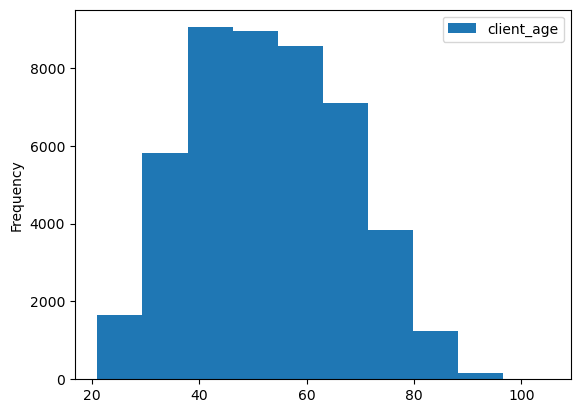

In [16]:
_ = client_data[["client_age"]].plot(kind="hist")

- Five months' worth of data is available. Months 1 and 4 are assigned 30 days each, while the rest are assigned 31 days.

In [17]:
calendar_data["month_name"].value_counts()

month_name
Month 2    31
Month 3    31
Month 5    31
Month 1    30
Month 4    30
Name: count, dtype: int64

- The data spans from June 1, 2019, to the last day of October 2019.

In [18]:
df["deposit_date"].min(), df["deposit_date"].max()

('2019-06-01', '2019-10-31')

- The type and cadence of the deposits continue to be explored.

In [20]:
df["deposit_type"].value_counts()

deposit_type
Scheduled Deposit    247986
Actual Deposit       232408
Name: count, dtype: int64

In [21]:
df["deposit_cadence"].value_counts()

deposit_cadence
Monthly     262858
Biweekly    209189
Extra         8347
Name: count, dtype: int64

- The deposit amount is now being examined. The plot below shows the sum of all the deposits, grouped by month.

### Deposit Data Analysis

In [24]:
# converting the date column type to a datetime object
df["deposit_date"] = pd.to_datetime(df["deposit_date"])

In [80]:
def plot_grouped_data(df, group_by, agg_column, plot_type, title, xlabel, ylabel):
    """
    Plots grouped data based on given parameters. Handles both single-column and multi-column grouping.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        group_by (str or list): Column(s) to group by.
        agg_column (str): The column to aggregate.
        plot_type (str): The type of plot ('line' or 'bar').
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
    """
    # Aggregate the data
    aggregated_data = df.groupby(group_by)[agg_column].sum()

    # Check if group_by creates a MultiIndex
    is_multi_index = isinstance(aggregated_data.index, pd.MultiIndex)


    # Plot based on the type and index structure
    if plot_type == 'line':
        if is_multi_index:
            ax = aggregated_data.unstack(level=0).plot(kind='line')
        else:
            ax = aggregated_data.plot(kind='line')
    elif plot_type == 'bar':
        if is_multi_index:
            ax = aggregated_data.unstack(level=0).plot(kind='bar')
        else:
            ax = aggregated_data.plot(kind='bar')
    else:
        raise ValueError(f"Invalid plot_type '{plot_type}'. Use 'line' or 'bar'.")

    # Add labels and title
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.tight_layout()
    plt.show()


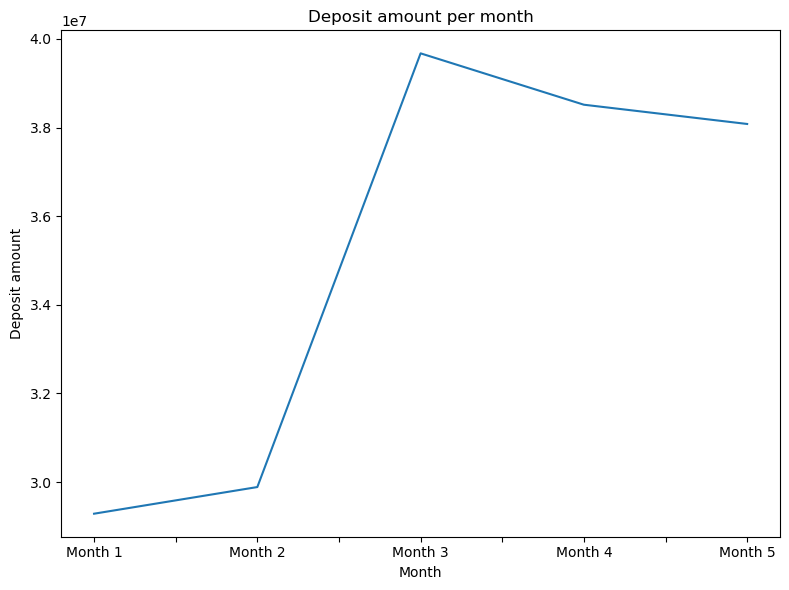

In [61]:
# Plot Deposit amount per month
plot_grouped_data(df, 'month_name', 'deposit_amount', 'line', 'Deposit amount per month', 'Month', 'Deposit amount')

- The graph displays a sharp increase in deposit amounts starting from the middle of the data range, followed by a decline or plateau towards the end. The pattern suggests significant variability in deposit behavior over time.

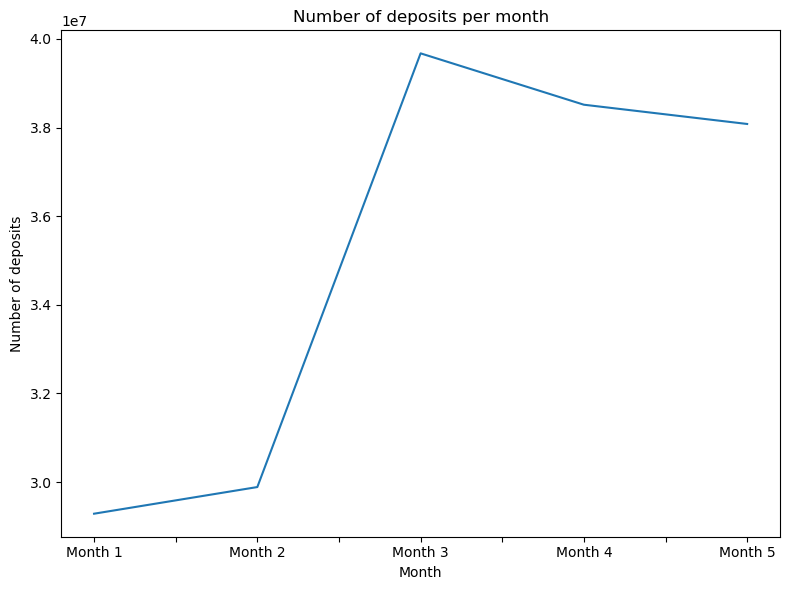

In [62]:
# Plot Number of deposits per month
plot_grouped_data(df, 'month_name', 'deposit_amount', 'line', 'Number of deposits per month', 'Month', 'Number of deposits')

- The graph shows a sharp increase in the number of deposits starting mid-period, peaking towards the end. This suggests a sudden surge in deposit frequency.

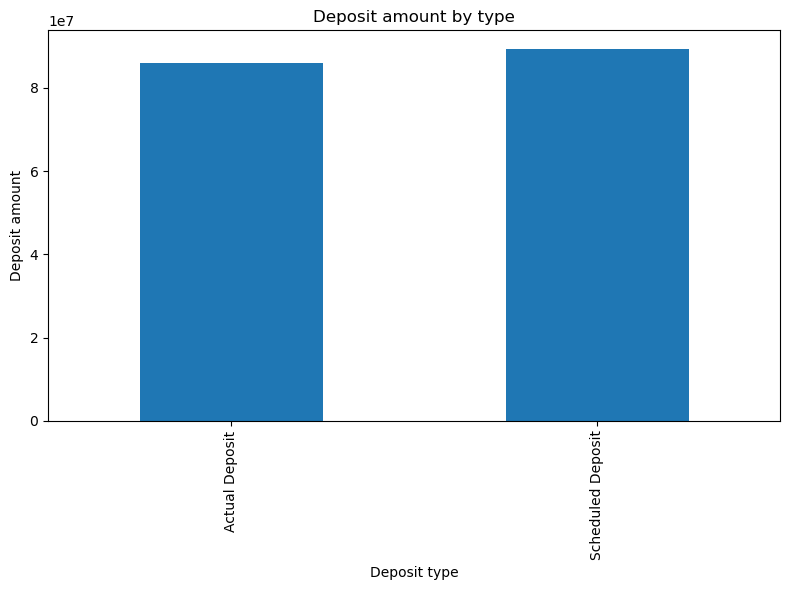

In [63]:
# Plot Deposit amount by type
plot_grouped_data(df, 'deposit_type', 'deposit_amount', 'bar', 'Deposit amount by type', 'Deposit type', 'Deposit amount')

- The graph reveals that the total amounts for "Actual Deposits" and "Scheduled Deposits" are nearly identical, with minimal variation.

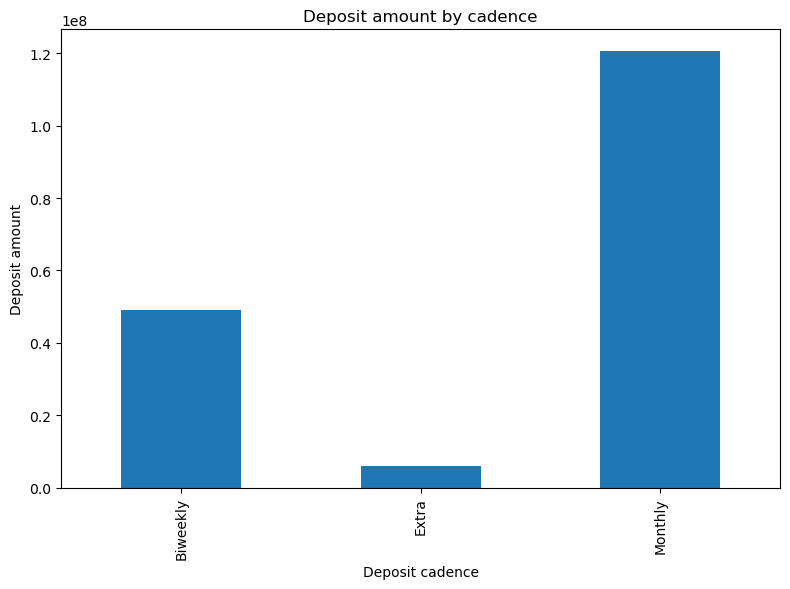

In [64]:
# Plot Deposit amount by cadence
plot_grouped_data(df, 'deposit_cadence', 'deposit_amount', 'bar', 'Deposit amount by cadence', 'Deposit cadence', 'Deposit amount')

- The chart shows that monthly deposits account for the largest share, with biweekly and extra deposits being much smaller.

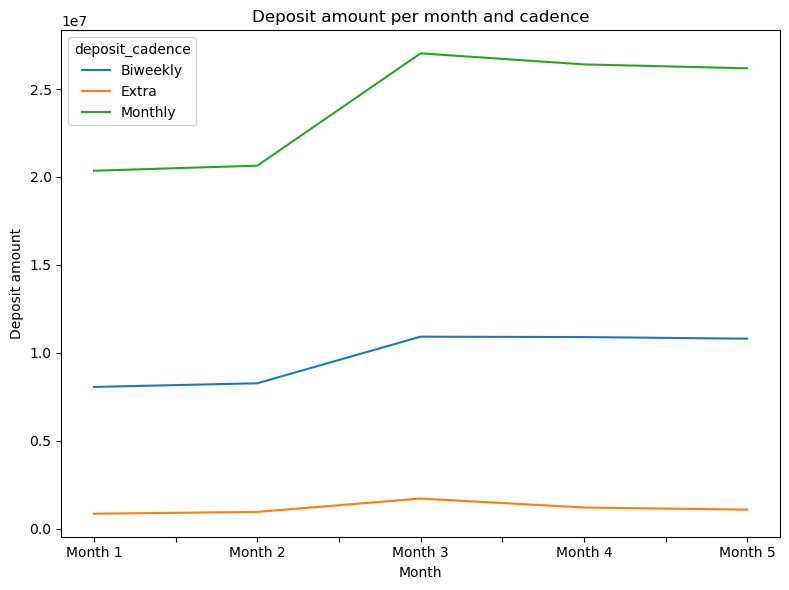

In [65]:
# Plot Deposit amount per month and cadence
plot_grouped_data(df, ['deposit_cadence', 'month_name'], 'deposit_amount', 'line', 'Deposit amount per month and cadence', 'Month', 'Deposit amount')

- Biweekly and Extra start low and increase, while Monthly starts high and stays stable. Month 3 is a peak for Biweekly and Extra, and Month 5 shows stabilization.

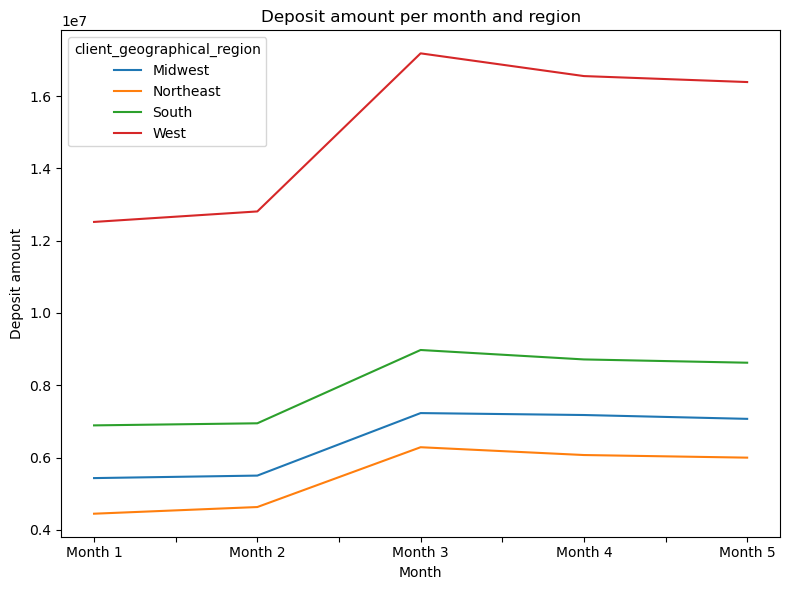

In [67]:
# Plot Deposit amount per month and region
plot_grouped_data(df, ['client_geographical_region', 'month_name'], 'deposit_amount', 'line', 'Deposit amount per month and region', 'Month', 'Deposit amount')

- West region had the highest initial deposit amount, while the Northeast and South regions experienced the most significant growth over the five months.

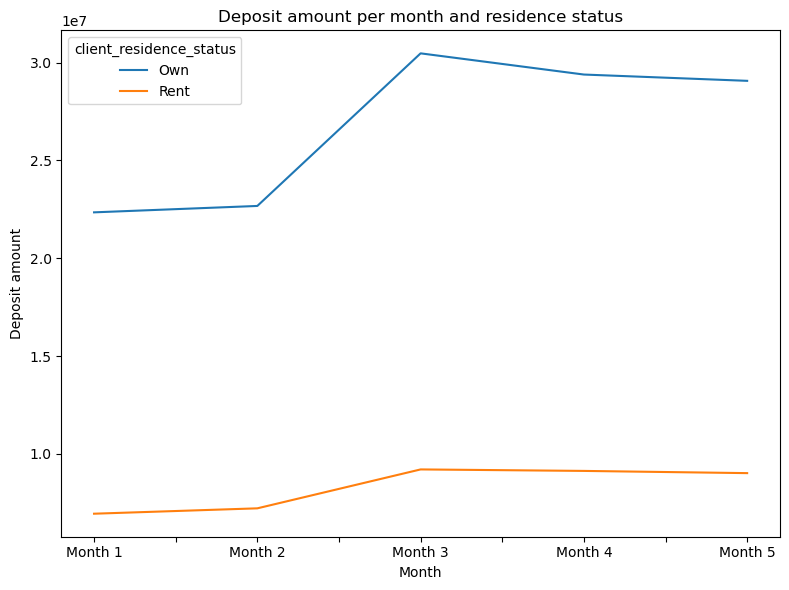

In [68]:
# Plot Deposit amount per month and residence status
plot_grouped_data(df, ['client_residence_status', 'month_name'], 'deposit_amount', 'line', 'Deposit amount per month and residence status', 'Month', 'Deposit amount')

- The graph suggests that clients who own their homes tend to have higher deposit amounts, especially in the initial months.

### Quantitative Assessment of Campaign Success

The provided plots, particularly those illustrating monthly deposit amounts, offer a clear quantitative assessment of the marketing campaign's effectiveness. A significant spike in deposits is evident during the campaign month (Month 8), with a subsequent, albeit gradual, decline.

#### Key Metrics and Analysis:

- Deposit Increase: During the campaign month, deposits surged by nearly $10 million compared to previous months.

- Post-Campaign Trend: While the monthly deposit amount has decreased post-campaign, it remains substantially higher than pre-campaign levels. The immediate post-campaign month saw an 8.5 million usd increase, and the final month of the dataset still recorded an $8 million increase.

- Cost-Benefit Analysis: The campaign cost 5 million. Assuming a conservative 18 % fee on the 26.5 million increase in deposits, the company realized a profit increase of 4.77 million. This suggests a net gain of $230K, even accounting for the campaign cost.

#### Conclusion:

The substantial and sustained increase in deposits, coupled with the positive financial impact, strongly indicates the success of the marketing campaign. While a more precise analysis would require additional information about fee structures and client demographics, the available data provides compelling evidence of the campaign's effectiveness.


- Another way to quantitatively assess the campaign is by examining the number of new clients acquired during and after the marketing campaign.

In [70]:
clients_before_campaign = df[(df["month_name"] == "Month 1")| (df["month_name"] == "Month 2")]["client_id"].unique()
clients_before_campaign.shape

(34051,)

In [71]:
clients_during_campaign = df[(df["month_name"] == "Month 3")]["client_id"].unique()
clients_during_campaign.shape

(43806,)

In [72]:
clients_after_campaign = df[(df["month_name"] == "Month 4")
                          | (df["month_name"] == "Month 5")]["client_id"].unique()
clients_after_campaign.shape

(41862,)

#### Question: How many new clients were acquired during the ad campaign?

**PS**:A new client is defined as someone who made their first deposit during the campaign period.

In [73]:
len(set(clients_during_campaign).difference(set(clients_before_campaign)))

11544

- How the number of scheduled and actual deposits varies over time is another interesting aspect worth investigating

In [77]:
# Clients after the campaign, excluding those before or during the campaign
new_clients_after_campaign = set(clients_after_campaign) - set(clients_before_campaign) - set(clients_during_campaign)
len(new_clients_after_campaign)

752

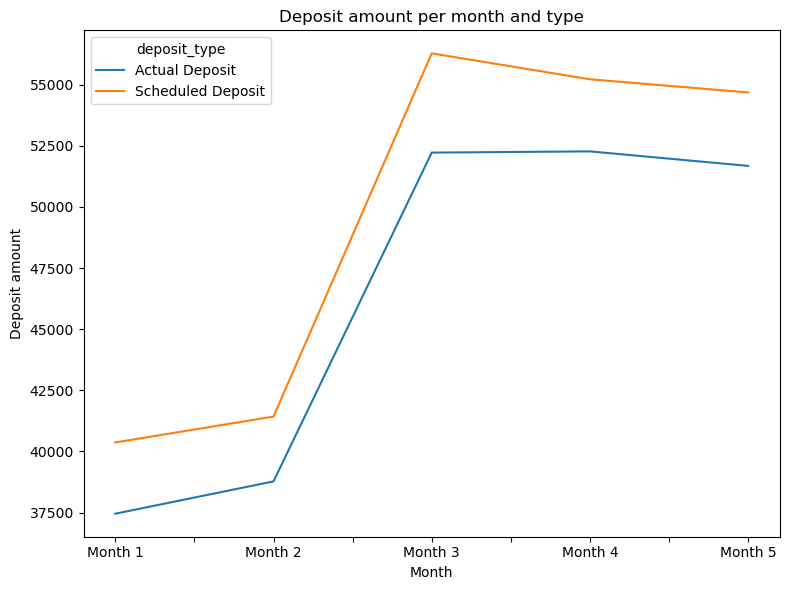

In [81]:
temp_df = df.groupby(by=[df["deposit_type"], df["month_name"]])["deposit_type"].count()

ax = temp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and type")
plt.tight_layout()

- As anticipated, this plot closely aligns with the distributions seen in the analysis section. During the ad campaign, both actual and scheduled deposits saw a 25% increase, equating to 10K additional transactions. While there is a gradual decline in the subsequent two months, the deposit amounts remain elevated, staying above 50K per type, compared to the pre-campaign levels of around 40K.

## Question: Given the data, what adjustments could be made to future campaign strategies to enhance performance?

While the temporal trends across most plots appear consistent, a deeper dive into targeted marketing offers potential. The data suggests a significant portion of the audience is middle-aged (40-60 years old) homeowners, as indicated by the age histogram and residence status analysis in the EDA section.


- The subsequent plot illustrates the variation in deposit amounts over time, stratified by age groups (categorized in decades).



In [82]:
dff = df.copy(deep=True)
dff["age_group"] = (dff["client_age"] // 10).astype(int)
dff

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name,age_group
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,Month 2,9
1,321708286091707,West,Own,83,Actual Deposit,200.0,Extra,2019-10-19,Month 5,8
2,321708286091707,West,Own,83,Actual Deposit,50.0,Extra,2019-08-26,Month 3,8
3,321708286091707,West,Own,83,Scheduled Deposit,200.0,Monthly,2019-08-01,Month 3,8
4,321708286091707,West,Own,83,Actual Deposit,200.0,Monthly,2019-09-01,Month 4,8
...,...,...,...,...,...,...,...,...,...,...
480389,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-04,Month 4,8
480390,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-09-18,Month 4,8
480391,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-18,Month 4,8
480392,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-10-06,Month 5,8


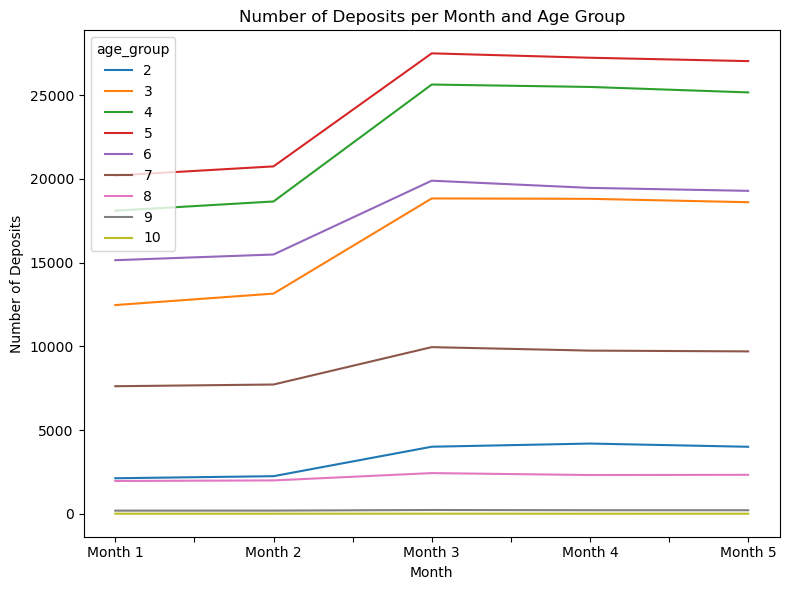

In [83]:
# Group by age_group and month_name, counting the number of deposits
tmp_df = dff.groupby(by=["age_group", "month_name"]).size()

# Plot the data with unstacked age groups
ax = tmp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Number of Deposits")
ax.set_title("Number of Deposits per Month and Age Group")
plt.tight_layout()

- The data indicates a substantial growth in middle-aged customers, while younger and older demographics show minimal change. This suggests that focusing on engaging with middle-aged customers could yield significant increases in deposits.

In [84]:
df_q2 = df[(df["client_residence_status"] == "Own") 
         & (df["client_age"] <= 60) 
         & (df["client_age"] >= 40)]
df_q2.shape

(181068, 9)

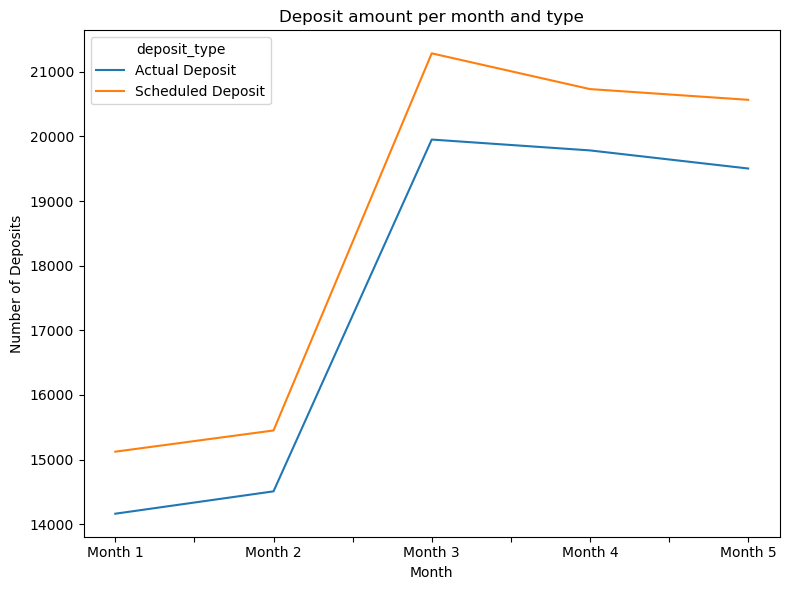

In [88]:
temp_df = df_q2.groupby(by=[df_q2["deposit_type"], df_q2["month_name"]])["deposit_type"].size()

ax = temp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Number of Deposits")
ax.set_title("Deposit amount per month and type")
plt.tight_layout()

- Middle-aged customers, despite representing only 37% of the customer base, contribute significantly to the overall deposit growth, accounting for 42% of the additional deposits.

In [89]:
# Calculating the sum of 'Extra' deposits in df_q2
extra_deposit_q2_sum = df_q2[df_q2["deposit_cadence"] == "Extra"]["deposit_amount"].sum()

# Calculating the sum of 'Extra' deposits in the entire dataset
total_extra_deposit_sum = df[df["deposit_cadence"] == "Extra"]["deposit_amount"].sum()

# Calculating and displaying the proportion
proportion = extra_deposit_q2_sum / total_extra_deposit_sum
print(f"Proportion of 'Extra' deposits in df_q2 relative to the entire dataset: {proportion:.2%}")


Proportion of 'Extra' deposits in df_q2 relative to the entire dataset: 42.35%


In [90]:
df_q2.shape[0] / df.shape[0]

0.3769156150992727

- The extra deposits can be further explored to identify client groups of interest.

In [91]:
df[df["deposit_cadence"] == "Extra"]["client_geographical_region"].value_counts()

client_geographical_region
West         3570
South        1991
Midwest      1486
Northeast    1300
Name: count, dtype: int64

In [92]:
df[df["deposit_cadence"] == "Extra"]["client_residence_status"].value_counts()

client_residence_status
Own     5856
Rent    2491
Name: count, dtype: int64

In [93]:
df[df["deposit_cadence"] == "Extra"]["deposit_type"].value_counts()

deposit_type
Actual Deposit    8347
Name: count, dtype: int64

In [94]:
df[df["deposit_cadence"] == "Extra"]["month_name"].value_counts()

month_name
Month 3    2235
Month 4    1898
Month 5    1846
Month 2    1274
Month 1    1094
Name: count, dtype: int64

**Key points based on the previous cells:**

- The West region is where most extra deposits are observed, as expected. This distribution closely matches the distribution of other deposit types as well.
- Clients who own their residence are approximately 2.33 times more likely to make extra deposits compared to clients who rent their residence.
- Most extra deposits are observed in Month 3, when the campaign was running. Post-campaign numbers for extra deposits are 33% higher than pre-campaign.